# Image Examples

In [1]:
from openai import OpenAI

# Configure client to use local server
client = OpenAI(
    base_url="http://localhost:10240/v1",  # Point to local server
    api_key="not-needed"  # API key is not required for local server
)

utils for display images

In [19]:
from IPython.display import display, Image as IPyImage
import io
import base64

def display_image(image_path):
    # 如果路径是 file:// URL 格式，则转换为本地路径
    if image_path.startswith('file://'):
        image_path = image_path[7:]  # 移除 "file://" 前缀
    
    with open(image_path, 'rb') as f:
        img_byte_arr = f.read()
    display(IPyImage(data=img_byte_arr))

def display_base64_image(image_base64):
    img_byte_arr = io.BytesIO(base64.b64decode(image_base64))
    display(IPyImage(data=img_byte_arr.getvalue()))

## v1/images/generations

You can directly test using the curl method, as follows:

```shell
curl http://localhost:10240/v1/images/generations \
  -H "Content-Type: application/json" \
  -d '{
    "model": "dhairyashil/FLUX.1-schnell-mflux-4bit",
    "prompt": "A cute baby sea otter",
    "n": 1,
    "size": "1024x1024"
  }'

```

You can also use OpenAI's Python SDK in the project for access, which can basically be done without feeling. As follows:

In [27]:
response = client.images.generate(
    model="dhairyashil/FLUX.1-schnell-mflux-4bit",
    prompt="detailed cinematic dof render of an old dusty detailed CRT monitor on a wooden desk in a dim room with items around, messy dirty room. On the screen are the letters ‘MLX’ glowing softly. High detail hard surface render",
    n=1,
    size="512x512",
    response_format="url"
)

response

ImagesResponse(created=1747365974, data=[Image(b64_json=None, revised_prompt='detailed cinematic dof render of an old dusty detailed CRT monitor on a wooden desk in a dim room with items around, messy dirty room. On the screen are the letters ‘MLX’ glowing softly. High detail hard surface render', url='file:///var/folders/07/bt1n4pzn5ln_b8ts86fztw9w0000gn/T/mlx_omni_server/images/1747365960_0.png')], usage=None)

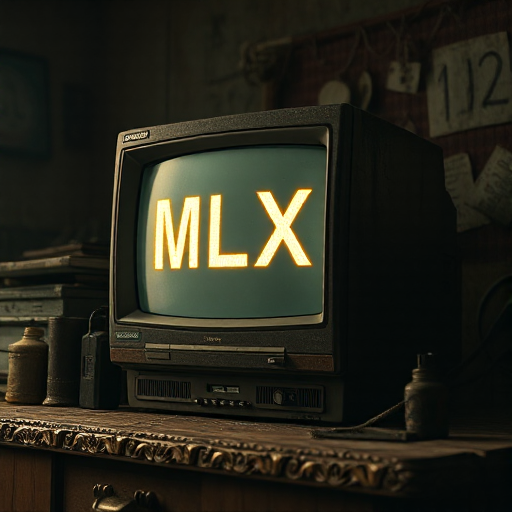

In [28]:
display_image(response.data[0].url)

## shou_xin LoRA Adapters

https://huggingface.co/Datou1111/shou_xin

In [69]:
response = client.images.generate(
    model="dev",
    prompt="shou_xin, A color pencil sketch of a woman wearing red dress, realistic, close up, minimalist, impressionism, negative space",
    n=1,
    response_format="url",
    extra_body={
        "lora-paths": ["/Users/madroid/workspace/mlx-omni-server/examples/shou_xin.safetensors"],
        "steps":20,
        "quantize": 8,
    }
)

response

ImagesResponse(created=1747394816, data=[Image(b64_json=None, revised_prompt='shou_xin, A color pencil sketch of a woman wearing red dress, realistic, close up, minimalist, impressionism, negative space', url='file:///var/folders/07/bt1n4pzn5ln_b8ts86fztw9w0000gn/T/mlx_omni_server/images/1747394566_0.png')], usage=None)

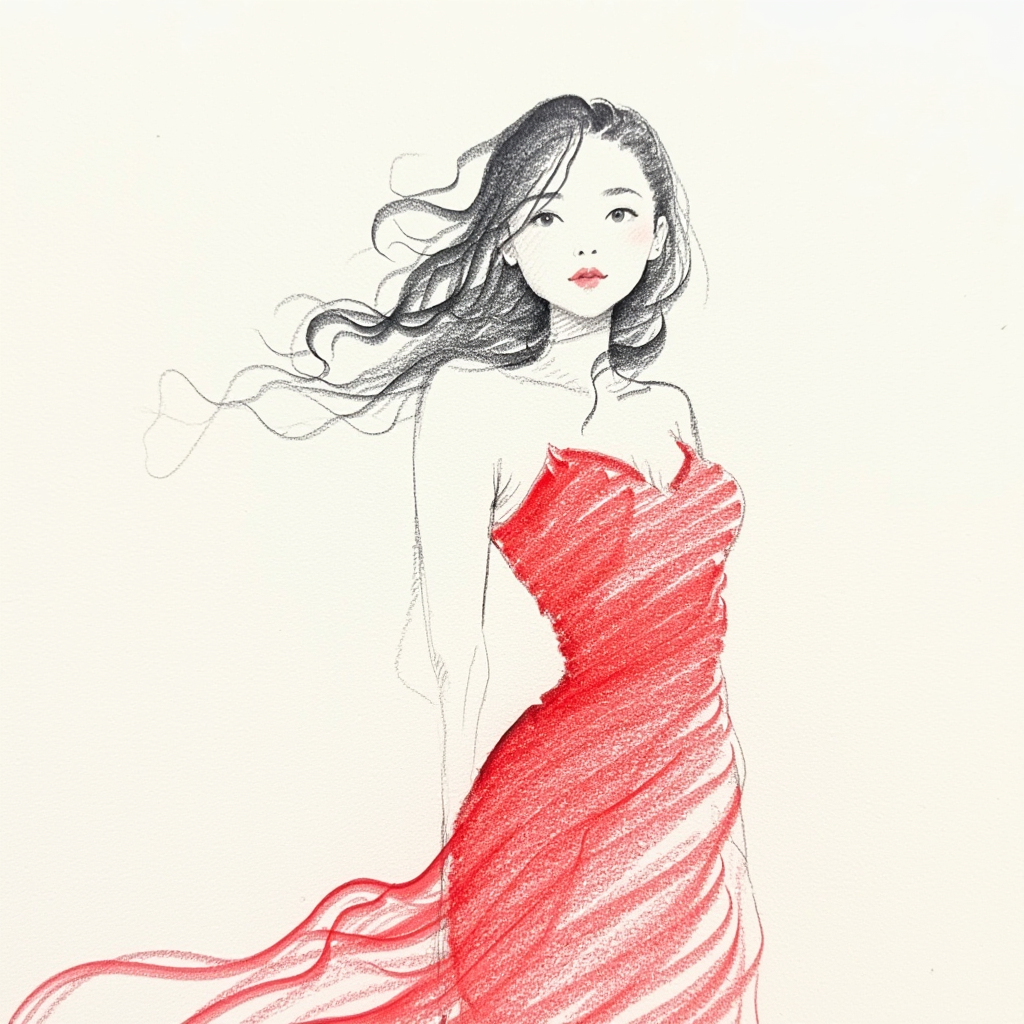

In [66]:
display_image(response.data[0].url)

## Ghibli LoRA Adapters

https://huggingface.co/openfree/flux-chatgpt-ghibli-lora

In [72]:
response = client.images.generate(
    model="dev",
    prompt="Ghibli style young mechanic girl in a floating workshop, surrounded by hovering tools and glowing mechanical parts, her blue overalls covered in oil stains, tinkering with a semi-transparent robot companion. Magical sparks fly as she works, while floating islands with waterfalls drift past her open workshop window. [trigger]",
    n=1,
    response_format="url",
    extra_body={
        "lora-paths": ["/Users/madroid/workspace/mlx-omni-server/examples/flux-chatgpt-ghibli-lora.safetensors"],
        "steps":20,
        "quantize": 8,
    }
)

response

ImagesResponse(created=1747395640, data=[Image(b64_json=None, revised_prompt='Ghibli style young mechanic girl in a floating workshop, surrounded by hovering tools and glowing mechanical parts, her blue overalls covered in oil stains, tinkering with a semi-transparent robot companion. Magical sparks fly as she works, while floating islands with waterfalls drift past her open workshop window. [trigger]', url='file:///var/folders/07/bt1n4pzn5ln_b8ts86fztw9w0000gn/T/mlx_omni_server/images/1747395395_0.png')], usage=None)

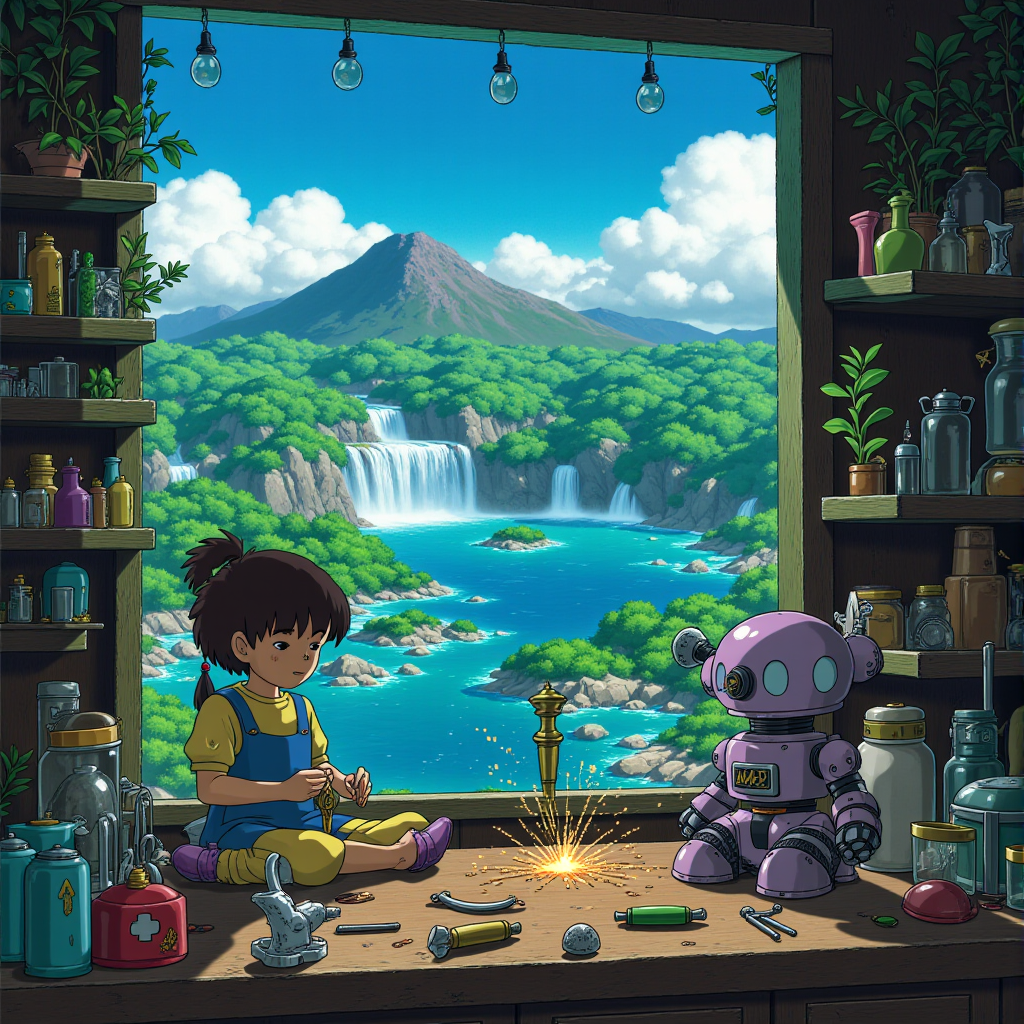

In [73]:
display_image(response.data[0].url)